## (1)

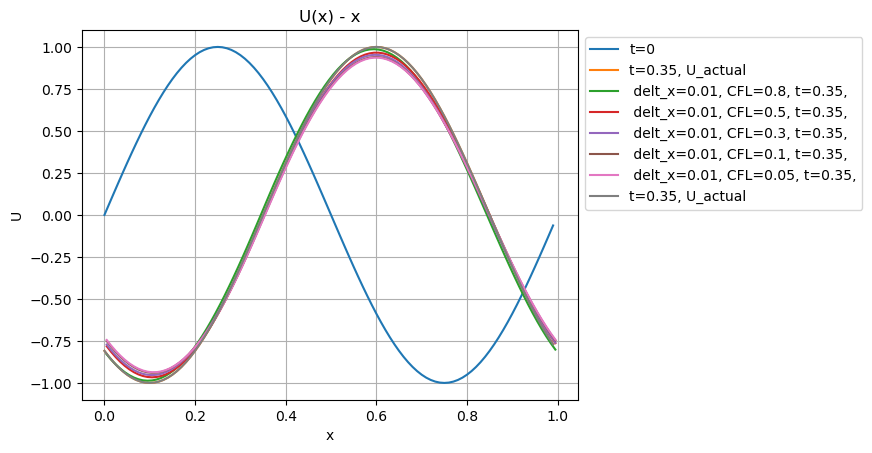

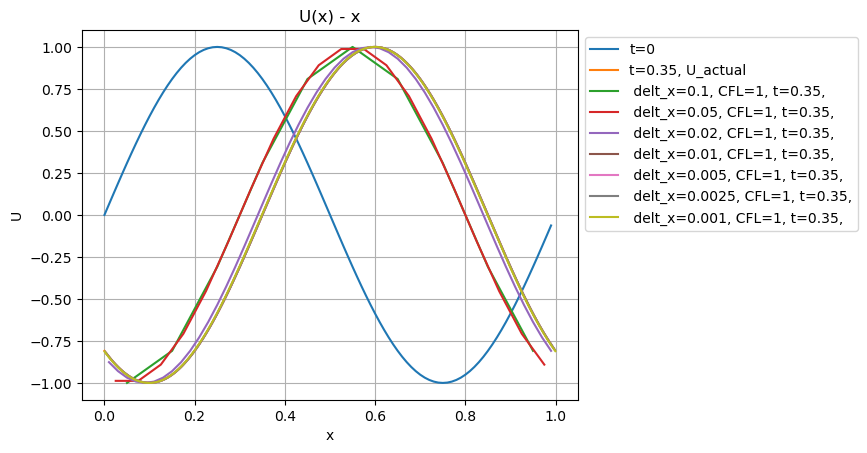

In [113]:
import numpy as np
import matplotlib.pyplot as plt

def u_0(X, n):
    return np.sin(2 * np.pi * X)

X0 = np.arange(0., 1., 0.01)
U0 = u_0(X0, 100) #以100个节点带入的初始值
U_actual = u_0(X0-0.35, 100) #t = 0.35的解析解


def diedai_huatu(delt_x, CFL, t):
    delt_t = delt_x * CFL
    n = int(1/delt_x)
    X = np.arange(delt_x/2, n*delt_x, delt_x) #生成横坐标X，共有n个元素
    Us = u_0(X, n) 
    Ue = np.zeros(n,dtype = np.float64) # 下一次的值，先赋值为0
    cishu = int(t/delt_t) # 迭代次数
    
    for itime in range(cishu): 
        Ue[0] = Us[n-1]

        for i in range(1,n): #给序号1的元素到序号n-2的元素赋值,range左闭右开！
            Ue[i] = Us[i] - CFL * (Us[i] - Us[i-1]) #DG(P_0)相当于FVM
        Us = Ue.copy()

    plt.plot(X, Ue, label=f" delt_x={delt_x}, CFL={CFL}, t={t},")

    return None


plt.figure(1)  # 创建第一个图形窗口

plt.plot(X0, U0, label="t=0") #初始解
plt.plot(X0, U_actual, label="t=0.35, U_actual") #t=0.35解析解
diedai_huatu(0.01, 1.00, 0.35) #delt_x=0.01, CFL=1.00, t=0.35
diedai_huatu(0.01, 0.80, 0.35) #delt_x=0.01, CFL=0.80, t=0.35
diedai_huatu(0.01, 0.50, 0.35) #delt_x=0.01, CFL=0.50, t=0.35
diedai_huatu(0.01, 0.30, 0.35) #delt_x=0.01, CFL=0.30, t=0.35
diedai_huatu(0.01, 0.10, 0.35) #delt_x=0.01, CFL=0.10, t=0.35
diedai_huatu(0.01, 0.05, 0.35) #delt_x=0.01, CFL=0.05, t=0.35

# 显示网格
plt.grid(True)

# 添加图例
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

# 添加标签和标题
plt.xlabel("x")
plt.ylabel("U")
plt.title("U(x) - x")

# 显示图像
plt.show()

plt.figure(2)  # 创建第一个图形窗口
plt.plot(X0, U0, label="t=0") #初始解
plt.plot(X0, U_actual, label="t=0.35, U_actual") #t=0.35解析解

diedai_huatu(0.1, 1, 0.35) #delt_x=0.1, CFL=1, t=0.35
diedai_huatu(0.05, 1, 0.35) #delt_x=0.05, CFL=1, t=0.35
diedai_huatu(0.02, 1, 0.35) #delt_x=0.02, CFL=1, t=0.35
diedai_huatu(0.01, 1, 0.35) #delt_x=0.01, CFL=1, t=0.35
diedai_huatu(0.005, 1, 0.35) #delt_x=0.005, CFL=1, t=0.35
diedai_huatu(0.0025, 1, 0.35) #delt_x=0.0025, CFL=1, t=0.35
diedai_huatu(0.001, 1, 0.35) #delt_x=0.001, CFL=1, t=0.35


# 显示网格
plt.grid(True)

# 添加图例
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

# 添加标签和标题
plt.xlabel("x")
plt.ylabel("U")
plt.title("U(x) - x")

# 显示图像
plt.show()

## (2)

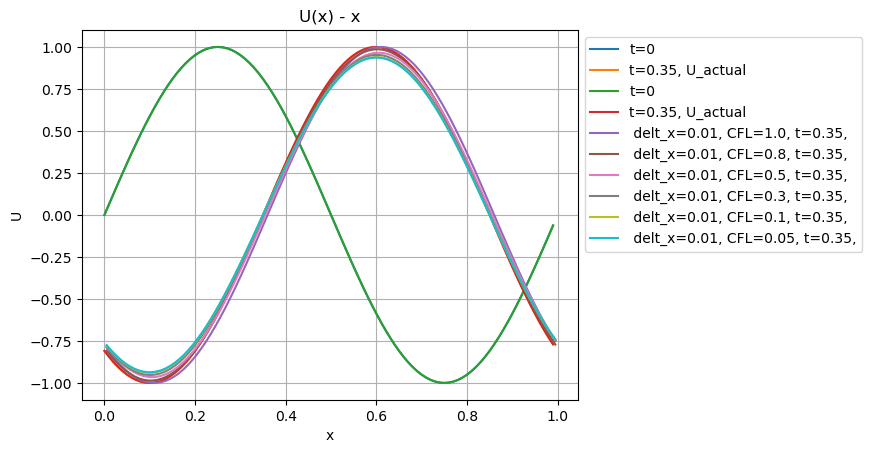

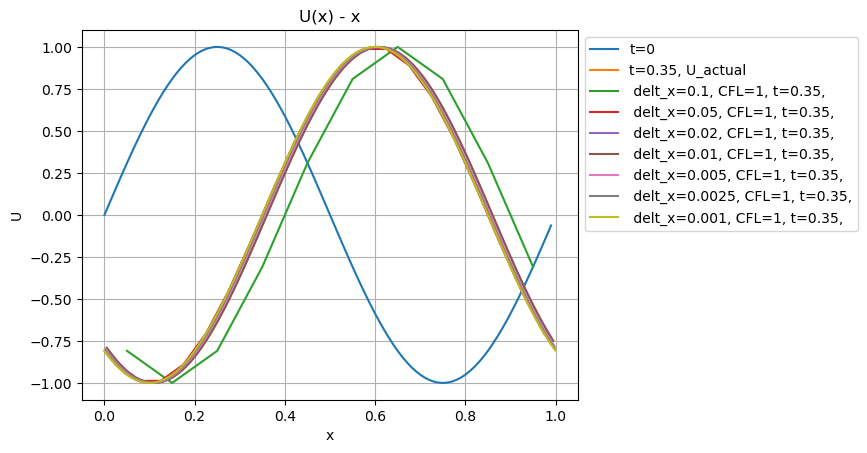

In [229]:
import numpy as np
import matplotlib.pyplot as plt

def u_0(X, n):
    return np.sin(2 * np.pi * X)

X0 = np.arange(0., 1., 0.01)
U0 = u_0(X0, 100) #以100个节点带入的初始值
U_actual = u_0(X0-0.35, 100) #t = 0.35的解析解

plt.plot(X0, U0, label="t=0") #初始解
plt.plot(X0, U_actual, label="t=0.35, U_actual") #t=0.35解析解
#以下所有n代表划分的份数,存储变量的个数为2n
    
def generate_X(n): #生成X
    values = np.linspace(1/(2*n), 1-1/(2*n), n)
    array = np.repeat(values, 2)
    return array
    
def value_diedai(X, n): #生成迭代过程的U值,有2n个值
    U0 = np.zeros(2*n,dtype = np.float64) #先赋值为0
    for i in range(2*n):
        if i % 2 == 0:
            U0[i] = np.sin(2 * np.pi * X[i])
        else:
            U0[i] = 2 * np.pi * np.cos(2 * np.pi * X[i])
    return U0

def generate_block_diag_np_inv(n): #生成质量矩阵M的逆
    delt_x = 1/n
    size = 2 * n  # 总矩阵大小 (2n x 2n)
    matrix = np.zeros((size, size), dtype=np.float64)  # 生成全零矩阵
    
    for i in range(n):
        start = 2 * i  # 计算当前块的起始索引
        matrix[start:start+2, start:start+2] = np.array([[1/delt_x, 0], [0, 12/(delt_x**3)]])  # 插入2x2小块

    return matrix

def generate_rightside_R(Us, n):#生成右侧向量R
    n_float = np.float64(n)
    delt_x = 1/n_float
    R = np.zeros(2*n,dtype = np.float64) #先赋值为0
    R[0] = -(Us[0]-Us[2*n-2])
    R[1] = (Us[0]-Us[2*n-2])-delt_x*(Us[0]-Us[2*n-2])/2
    for i in range(2, 2*n):
        if i % 2 ==0: #偶数
            R[i] = -(Us[i]-Us[i-2])
        else:
            R[i] = (Us[i-1]-Us[i-3])-delt_x*(Us[i-1]-Us[i-3])/2
    return R

def diedai_huatu2(delt_x, CFL, t): # 主要函数
    delt_t = delt_x * CFL
    n = int(1/delt_x) # 将1划分为n份
    X = generate_X(n)
    Us = value_diedai(X, n) #初始值Us,包含2n个值, 
    Ue = np.zeros(2*n,dtype = np.float64) # 下一次的值，包含2n个值，先赋值为0
    M_inv = generate_block_diag_np_inv(n)# 划分为n份的质量矩阵M的逆
    cishu = int(t/delt_t) # 迭代次数
    for itime in range(cishu+1): 
        R = generate_rightside_R(Us, n)
        Ue = Us + np.dot(M_inv, R*delt_t)
        Us = Ue.copy()

    X_plot = np.copy(X[np.arange(0, len(X), 2)])
    Ue_plot = np.copy(Ue[np.arange(0, len(X), 2)])
    plt.plot(X_plot, Ue_plot, label=f" delt_x={delt_x}, CFL={CFL}, t={t},")
    return None


plt.figure(1)  # 创建第一个图形窗口

plt.plot(X0, U0, label="t=0") #初始解
plt.plot(X0, U_actual, label="t=0.35, U_actual") #t=0.35解析解
diedai_huatu2(0.01, 1.00, 0.35) #delt_x=0.01, CFL=1.00, t=0.35
diedai_huatu2(0.01, 0.80, 0.35) #delt_x=0.01, CFL=0.80, t=0.35
diedai_huatu2(0.01, 0.50, 0.35) #delt_x=0.01, CFL=0.50, t=0.35
diedai_huatu2(0.01, 0.30, 0.35) #delt_x=0.01, CFL=0.30, t=0.35
diedai_huatu2(0.01, 0.10, 0.35) #delt_x=0.01, CFL=0.10, t=0.35
diedai_huatu2(0.01, 0.05, 0.35) #delt_x=0.01, CFL=0.05, t=0.35

# 显示网格
plt.grid(True)

# 添加图例
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

# 添加标签和标题
plt.xlabel("x")
plt.ylabel("U")
plt.title("U(x) - x")

# 显示图像
plt.show()

plt.figure(2)  # 创建第一个图形窗口
plt.plot(X0, U0, label="t=0") #初始解
plt.plot(X0, U_actual, label="t=0.35, U_actual") #t=0.35解析解

diedai_huatu2(0.1, 1, 0.35) #delt_x=0.1, CFL=1, t=0.35
diedai_huatu2(0.05, 1, 0.35) #delt_x=0.05, CFL=1, t=0.35
diedai_huatu2(0.02, 1, 0.35) #delt_x=0.02, CFL=1, t=0.35
diedai_huatu2(0.01, 1, 0.35) #delt_x=0.01, CFL=1, t=0.35
diedai_huatu2(0.005, 1, 0.35) #delt_x=0.005, CFL=1, t=0.35
diedai_huatu2(0.0025, 1, 0.35) #delt_x=0.0025, CFL=1, t=0.35
diedai_huatu2(0.001, 1, 0.35) #delt_x=0.001, CFL=1, t=0.35


# 显示网格
plt.grid(True)

# 添加图例
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

# 添加标签和标题
plt.xlabel("x")
plt.ylabel("U")
plt.title("U(x) - x")

# 显示图像
plt.show()